# El atractor de Lorenz

**Objetivo general**
- Resolver numéricamente el sistema de ecuaciones de Lorenz usando el método de Euler hacia adelante.

**Objetivos particulares**
- Entender el modelo conceptual y matemático del atracto de Lorenz.
- Plantear un modelo numérico basado en el método de Euler hacia adelante para aproximar las soluciones.
- Implementar los algoritmos del modelo numérico.
- Graficar del atractor de Lorenz para varios valores de sus parámetros.

## Contenido
- [1. Modelo Conceptual.](#1)
- [2. Modelo Matemático.](#2)
- [3. Modelo Numérico.](#3)
- [4. Modelo Computacional.](#4)

<a name='1'></a>
## Modelo Conceptual

En 1963 Edward Lorenz definió un [sistema dinámico determinista tridimensional no lineal](https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml?tab_body=pdf), el cual derivó de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la **atmósfera terrestre**. A este sistema se le conoce como **Atractor de Lorenz**,
[[Represa, Soledad. (2016). Ecuaciones de Lorenz. 10.13140/RG.2.2.18508.82563]](https://www.researchgate.net/publication/316629141_Ecuaciones_de_Lorenz).


In [1]:
%%html
<iframe width="600" height="400" src="https://www.youtube.com/embed/XZ7Ly7dDCzo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

<a name='2'></a>
## Modelo Matemático.

El sistema definido por Lorenz presenta un comportamiento caótico y suele aparecer también en otros fenómenos físicos. Consiste de tres ecuaciones diferenciales ordinarias no lineales que se escriben como sigue:

$$
\begin{eqnarray}
\dfrac{dx}{dt} & = & \sigma(y − x), \tag{1}\\
\dfrac{dy}{dt} & = & x(\rho − z) − y, \tag{2} \\
\dfrac{dz}{dt} & = & xy − \beta z \tag{3}
\end{eqnarray}
$$

donde $\sigma$ es conocido como el número de Prandtl y $\rho$ el número de Rayleigh. Ambos son parámetros adimensionales que definen el movimiento convectivo en la atmósfera.

Usualmente $\sigma = 10$, $\beta = 8/3$, $\rho$ es variado. El sistema exhibe un comportamiento **caótico** para $\rho = 28$. Se debe cumplir que $\sigma, \beta, \rho > 0$.

En las ecuaciones anteriores, $x$ es proporcional a la intensidad del movimiento convectivo, $y$ es proporcional a la diferencia de temperaturas entre las corrientes ascendentes y descendentes y $z$ es proporcional a la desviación de la linealidad del perfil de temperaturas vertical.

Dadas las condiciones iniciales, la solución de este sistema define trayectorias en el espacio fase $xyz$ cuya forma recuerdan a una mariposa; de aquí que el atractor de Lorenz puede haber inspirado el nombre del **efecto mariposa** en la teoría del caos.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/gIwvFMiJNVU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

<a name='3'></a>
## Modelo Numérico

El sistema representado por las ecuaciones $(1), (2)$ y $(3)$ puede ser resuelto numéricamente aplicando el método de Euler hacia adelante. Con dicho método obtenemos las siguientes ecuaciones en diferencias, cuya aprocimación es de orden lineal $\mathcal{O}(h_t)$:

$$
\begin{eqnarray}
x(t_{n+1}) & = & x(t_n) + h_t * F\big(t_n, x(t_n), y(t_n), z(t_n)\big) \tag{4}\\
y(t_{n+1}) & = & y(t_n) + h_t * G\big(t_n, x(t_n), y(t_n), z(t_n)\big) \tag{5}\\
z(t_{n+1}) & = & z(t_n) + h_t * H\big(t_n, x(t_n), y(t_n), z(t_n)\big) \tag{6}
\end{eqnarray}
$$

donde:

$$
\begin{eqnarray}
F\big(t_n, x(t_n), y(t_n), z(t_n)\big) & = & \sigma * \big(y(t_n) − x(t_n)\big) \tag{7} \\
G\big(t_n, x(t_n), y(t_n), z(t_n)\big) & = & x(t_n) * \big(\rho − z(t_n) \big) − y(t_n) \tag{8}\\
H\big(t_n, x(t_n), y(t_n), z(t_n)\big) & = & x(t_n) * y(t_n) − \beta * z(t_n) \tag{9}
\end{eqnarray}
$$

Para que el método esté bien definido necesitamos condiciones iniciales:

$$
\begin{eqnarray}
x(t = 0) & = & x_0 \\
y(t = 0) & = & y_0 \\
z(t = 0) & = & z_0 \\
\end{eqnarray}
$$

Al resolver este problema obtendremos una lista de tuplas del tipo $(x_n,y_n,z_n)$ para $n=1, \dots, N_t$, que al graficarse generarán trayectorias en el espacio fase $xyz$.

En el siguiente interactivo mueva el valor de los parámetros y observe lo que sucede.

In [2]:
%run "./zInteractive.ipynb"

Output()

<a name='4'></a>
## Modelo Computacional

In [3]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import time
import macti.visual
#from macti.evaluacion import Evalua
#ȩ = Evalua('MetodoEuler')

Dadas las ecuaciones $(4), (5) y (6)$ y sus condiciones iniciales, es posible idear un algoritmo para encontrar $x, y, z$ para diferentes tiempos $t$.
Un algoritmo sería como el siguiente:

1. **Definir el número de trayectorias que desamos obtener en el espacio fase $xyz$.**
2. **Definir el paso de tiempo $dt$ y el número total de pasos de tiempo $Nt$.**
3. **Definir las posiciones iniciales de las trayectorias (condiciones iniciales $(x_0, y_0, z_0)$.**
4. **Definir un arreglo para almacenar las coordenadas de cada trayectoria.**
5. **Aplicar el método de Euler hacia adelante (Fórmulas $(4), (5), (6)$ ).**
    - En este paso definiremos función de Python para evaluar las funciones $F, G$ y $H$.
6. **Graficar las trayectorias en el espacio fase $xyz$.**

In [4]:
def lorenz_eqs(xyz, 𝜎=10.0, 𝛽=8./3, 𝜌=28.0):
    '''
    Evaluación de las funciones F, G y H de las ecuaciones de Lorenz.
    '''
    x, y, z = xyz
    return [𝜎 * (y - x),      # F
            x * (𝜌 - z) - y,  # G
            x * y - 𝛽 * z]    # H

In [5]:
# Parámetros del sistema de ecuaciones de Lorenz
𝜎 = 10.0 # Número de Prandtl
𝜌 = 28.0 # Número de Rayleigh
𝛽 = 8./3 

N = 2 # Número de trayectorias en el espacio fase    
Nt = 1000 # Número total de pasos
dt = 0.01 # Stepsize

# Posiciones iniciales
x0 = np.array([[ 5.98168845,  9.14898233, 18.04053198],
               [ 5.28839638,  7.82341498, 19.0658776 ]])

print('Número de Prandtl 𝜎 : {}'.format(𝜎))
print('Número de Rayleigh 𝜌 : {}'.format(𝜌))
print('Valor de 𝛽 : {}'.format(𝛽))
print('Numero total de trayectorias: {}'.format(N))
print('Numero total de pasos en el tiempo: {}'.format(Nt))
print('Tamaño del paso de tiempo: {}'.format(dt))
for i in range(N):
    print('Posición inicial de la trayectoria {} : {}'.format(i, x0[i]))

Número de Prandtl 𝜎 : 10.0
Número de Rayleigh 𝜌 : 28.0
Valor de 𝛽 : 2.6666666666666665
Numero total de trayectorias: 2
Numero total de pasos en el tiempo: 1000
Tamaño del paso de tiempo: 0.01
Posición inicial de la trayectoria 0 : [ 5.98168845  9.14898233 18.04053198]
Posición inicial de la trayectoria 1 : [ 5.28839638  7.82341498 19.0658776 ]


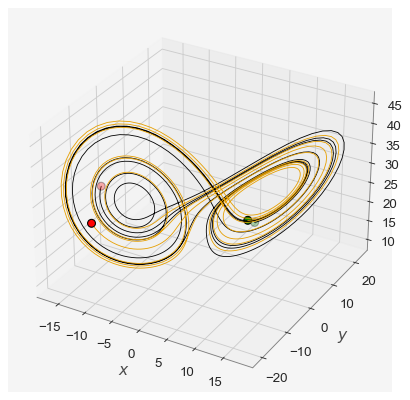

In [6]:
# Arreglo para almacenar las coordenadas de las trayectorias
trace = np.zeros((N, 3, Nt))

# Condición inicial.
trace[:,:,0] = x0

# Solución de las ecs. de Lorenz usando el método de Euler hacia adelante
for t in range(1, Nt):
    fx = np.asarray([lorenz_eqs(x) for x in trace[:,:,t-1]])
    trace[:,:,t] = trace[:,:,t-1] + dt * fx

# Graficación de las trayectorias en el espacio fase
fig = plt.figure();
ax = fig.add_axes([0, 0, 1, 1], projection='3d');
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# Graficamos la condicion inicial
ax.scatter(trace[:,0,0], trace[:,1,0], trace[:,2,0], fc='green', ec='k', s = 50, zorder=10) 

# Graficamos la trayectoria
for i in range(N):
    ax.plot(trace[i,0,:], trace[i,1,:], trace[i,2,:], '-', lw='0.75')

# Graficamos la posición final
ax.scatter(trace[:,0,-1], trace[:,1,-1], trace[:,2,-1], fc='red', ec='k', s = 50, zorder=5)
plt.show()

Hagamos ahora la gráfica en el plano fase $xz$

In [7]:
def plano_fase(plano = 'xz'):
    fig = plt.figure(figsize=(6,4));
    ax = fig.add_axes([0, 0, 1, 1]);

    if plano == 'xz':
        ax.set_xlabel('$x$')
        ax.set_ylabel('$z$')
        # Graficamos la condicion inicial
        ax.scatter(trace[:,0,0], trace[:,2,0], fc='green', ec='k', s = 50, zorder=10) 

        for i in range(N):
            ax.plot(trace[i,0,:], trace[i,2,:], '-', lw=2.0)

        # Graficamos la posición final
        ax.scatter(trace[:,0,-1], trace[:,2,-1], fc='red', ec='k', s = 50, zorder=5) 

    elif plano == 'xy':
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        # Graficamos la condicion inicial
        ax.scatter(trace[:,0,0], trace[:,1,0], fc='green', ec='k', s = 50, zorder=10) 

        for i in range(N):
            ax.plot(trace[i,0,:], trace[i,1,:], '-', lw=2.0)

        # Graficamos la posición final
        ax.scatter(trace[:,0,-1], trace[:,1,-1], fc='red', ec='k', s = 50, zorder=5) 

    elif plano == 'yz':
        ax.set_xlabel('$y$')
        ax.set_ylabel('$z$')
        # Graficamos la condicion inicial
        ax.scatter(trace[:,1,0], trace[:,2,0], fc='green', ec='k', s = 50, zorder=10) 

        for i in range(N):
            ax.plot(trace[i,1,:], trace[i,2,:], '-', lw=2.0)

        # Graficamos la posición final
        ax.scatter(trace[:,1,-1], trace[:,2,-1], fc='red', ec='k', s = 50, zorder=5) 
        
    plt.show()

In [8]:
widgets.interactive(plano_fase, plano = widgets.Dropdown(value='yz', 
                                                         options = ['xy', 'xz', 'yz'],
                                                         description = 'Plano fase'))

interactive(children=(Dropdown(description='Plano fase', index=2, options=('xy', 'xz', 'yz'), value='yz'), Out…